# **1.Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine learning project/processed data.csv")
data = data.drop(columns =['Unnamed: 0'])
data.head()

,MP,Min,Goals,Assists,CrdY,CrdR,Comp,Shots,Acceleration,Aggression,...,Vision,Volleys,age,name,overall,potential,preferred_foot,position common,market value,wage value
0,34,2983,0.06,0.00,0.15,0.03,Ligue 1,0.54,37,81,...,45,24,33,Yunis Abdelhamid,76,76,Left,defender,3600000.0,23000.0
1,31,2462,0.04,0.00,0.44,0.11,Ligue 1,0.66,50,79,...,65,38,21,Salis Abdul Samed,70,75,Right,midfielder,2200000.0,7000.0
2,34,2956,0.00,0.06,0.27,0.00,Ligue 1,0.91,77,76,...,66,37,28,Laurent Abergel,75,75,Right,midfielder,4900000.0,18000.0
3,24,726,0.00,0.12,0.37,0.00,Bundesliga,2.22,81,39,...,44,53,22,Dickson Abiama,68,76,Right,striker,2700000.0,9000.0
4,30,2536,0.14,0.00,0.07,0.04,Serie A,0.57,64,77,...,65,39,33,Francesco Acerbi,83,83,Left,defender,17500000.0,75000.0


# **2.see distribution  and boxplot of market value column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2002.000000
mean       12.013012
std        17.195709
min         0.110000
25%         2.425000
50%         5.500000
75%        15.000000
max       194.000000
Name: market value, dtype: float64

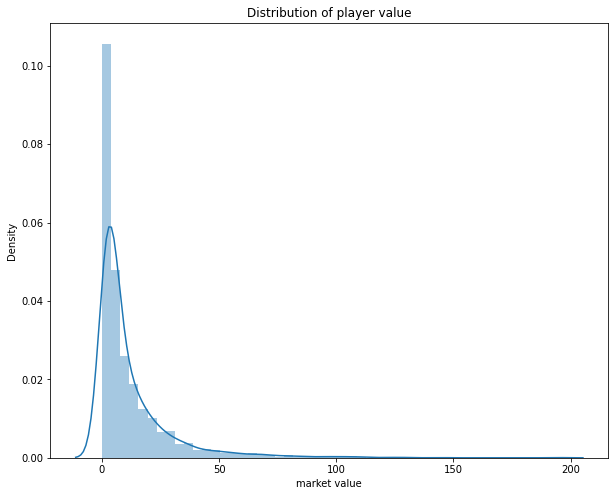

In [ ]:
def plot_distribution_and_boxplot(column, name):
    # distribution
    plt.figure(figsize = (10, 8))
    plt.title('Distribution of ' + name)
    sns.distplot(column, kde=True)
    
    # box plot
    fig = go.Figure()
    fig.add_trace(go.Box( y = column, name = 'Boxplot of ' + name,
                marker_color = 'indianred'))
    fig.show()
    
    display(column.describe())
    
plot_distribution_and_boxplot(data['market value'] / 1_000_000, 'player value')

 we can see that : the distribution of player value is very skewed . It makes predicting high priced players very difficult.The highest value player is €194M and the lowest value player is just €110000. The mean is approximately € 12M but with a very large standard deviation of €17M. Moreover, we see that the data has many outliers because most of the players are of low value.

 
=> we use log transformation to reduce variance in this column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    2002.000000
mean       15.576951
std         1.226445
min        11.608236
25%        14.701185
50%        15.520259
75%        16.523561
max        19.083369
Name: market value, dtype: float64

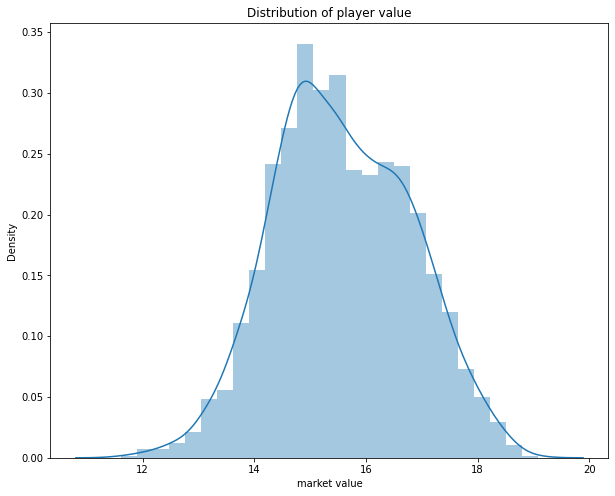

In [ ]:
# log tranformation
data['market value'] = np.log(data['market value'])
plot_distribution_and_boxplot(data['market value'], 'player value')

you can see that :Market value variable is  more normally distributed and has a much lower standard deviation compared to the mean. With this technique, we only 2 outliers in market value variable

# **3. Position**

### a.see percentage of player positions

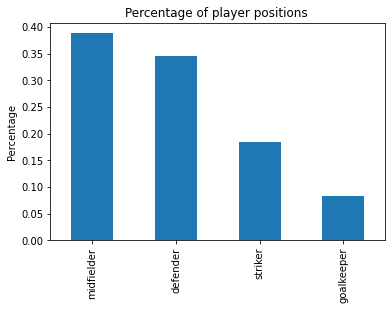

In [ ]:
data['position common'].value_counts(normalize=True).plot(kind='bar')
plt.title("Percentage of player positions ")
plt.ylabel("Percentage")
plt.show()

### b.see log value in each position

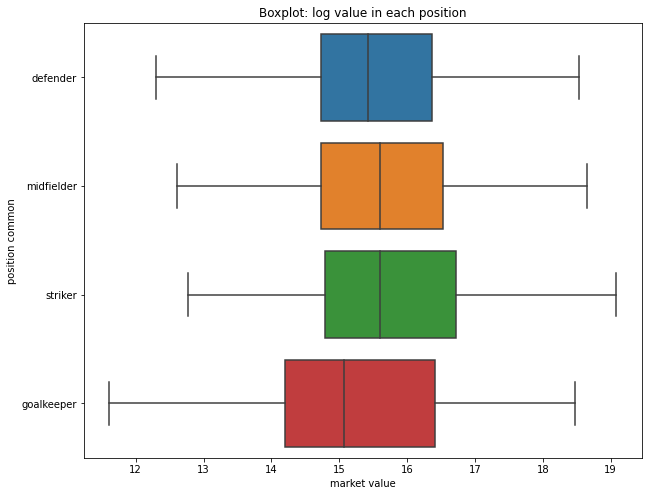

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='market value',y='position common',data=data)
plt.title("Boxplot: log value in each position")
plt.show()

we see that : The price of strikers is higher compared to other positions and the price of goalkeepers is always the lowest. 

=> It means that the trend of football is to attack. Football teams and professionals focus on strikers .The proof is that most of the best players of the year play in the striker position

# **4. Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    2002.000000
mean       25.394106
std         4.541774
min        16.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        40.000000
Name: age, dtype: float64

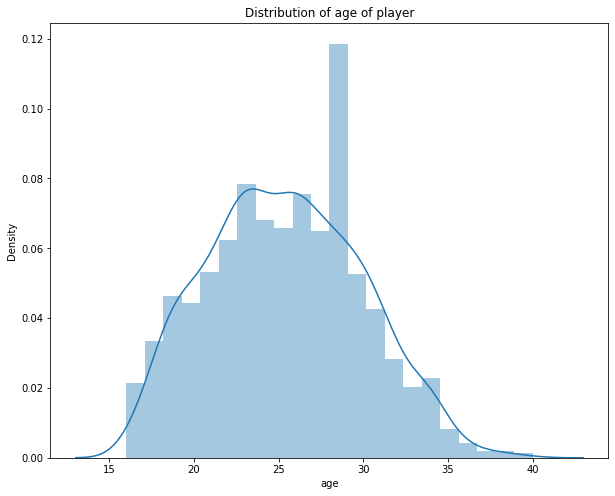

In [ ]:
plot_distribution_and_boxplot(data['age'], 'age of player')

 we see that : the distribution of age is near-normal distribution .Among them, there are about 88 players over 33 years old, notably messi and ronaldo

Person correlation : 0.08028985010855834


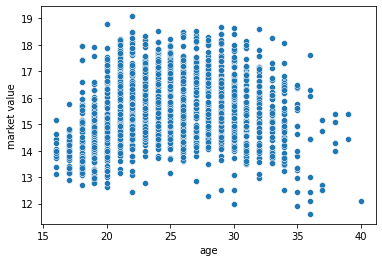

In [ ]:
# see correlation between age and market value
sns.scatterplot(data = data, x = "age", y = "market value");
print("Person correlation :", pearsonr(data['age'], data['market value'])[0]);

we see that : Age doesn't have much of an impact on the prices of players in the top 5 leagues